### Import your librares

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

### Load your dataset

In [2]:
df = pd.read_csv("seattle_weather.csv")

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


In [3]:
# Assess and Clean

df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25551 non-null  datetime64[ns]
 1   PRCP    25548 non-null  float64       
 2   TMAX    25551 non-null  int64         
 3   TMIN    25551 non-null  int64         
 4   RAIN    25548 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 998.2+ KB


In [4]:
def get_bounds(col):
    Q1 = np.nanpercentile(col, 25)
    Q3 = np.nanpercentile(col, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

**Date**

In [5]:
# Detect

fig = px.box(df, x='DATE')
fig.update_layout(
    title='DATE',
    width=800, 
    height=400,
)
fig.show()

print('No Outliers Detected')

No Outliers Detected


**PRCP**

In [6]:
# Detect

fig = px.box(df, x='PRCP')
fig.update_layout(
    title='PRCP With Outliers',
    width=800, 
    height=400,
)
fig.show()

# Identify
lower_bound, upper_bound = get_bounds(df['PRCP'])
print(f'Lower Bound:{lower_bound}\nUpper Bound: {upper_bound}')

# Drop

df_PRCP = df[(df['PRCP'] >= lower_bound) & (df['PRCP'] <= upper_bound)]

# Visualize

fig = px.box(df_PRCP, x='PRCP')
fig.update_layout(
    title='PRCP Without Outliers',
    width=800, 
    height=400,
)
fig.show()

Lower Bound:-0.15000000000000002
Upper Bound: 0.25


**TMAX**

In [7]:
# Detect

fig = px.box(df, x='TMAX')
fig.update_layout(
    title='TMAX With Outliers',
    width=800, 
    height=400,
)
fig.show()

# Identify
lower_bound, upper_bound = get_bounds(df['TMAX'])
print(f'Lower Bound:{lower_bound}\nUpper Bound: {upper_bound}')

# Drop

df_TMAX = df[(df['TMAX'] >= lower_bound) & (df['TMAX'] <= upper_bound)]

# Visualize

fig = px.box(df_TMAX, x='TMAX')
fig.update_layout(
    title='TMAX Without Outliers',
    width=800, 
    height=400,
)
fig.show()

Lower Bound:21.5
Upper Bound: 97.5


**TMIN**

In [8]:
# Detect

fig = px.box(df, x='TMIN')
fig.update_layout(
    title='TMIN With Outliers',
    width=800, 
    height=400,
)
fig.show()

# Identify
lower_bound, upper_bound = get_bounds(df['TMIN'])
print(f'Lower Bound:{lower_bound}\nUpper Bound: {upper_bound}')

# Drop

df_TMIN = df[(df['TMIN'] >= lower_bound) & (df['TMIN'] <= upper_bound)]

# Visualize

fig = px.box(df_TMIN, x='TMIN')
fig.update_layout(
    title='TMIN Without Outliers',
    width=800, 
    height=400,
)
fig.show()

Lower Bound:17.0
Upper Bound: 73.0


**RAIN**

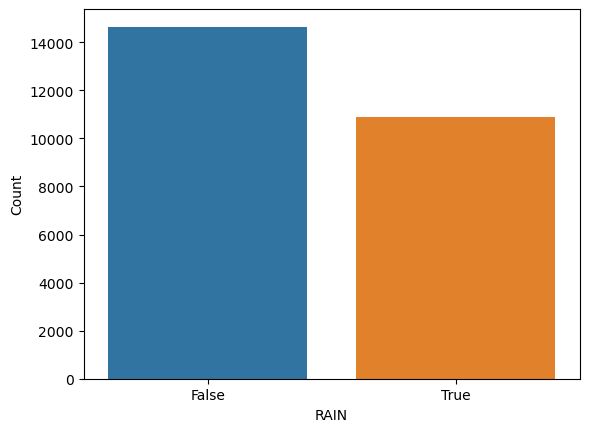

No Outliers Detected


In [21]:
# Detect

sns.countplot(x='RAIN', data=df)
plt.xlabel('RAIN')
plt.ylabel('Count')
plt.show()

print('No Outliers Detected')

# Drop missing values

df_RAIN = df.dropna()